# ***FI3104: Métodos numéricos para ciencias e ingeniería***
## **Tarea 2**
### Diego Olguín Wende
#### Fecha de entrega: 7 de septiembre de 2021

In [ ]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

### Problema 1 parte a


In [ ]:
# Función que simula la función pedida
def f_1(x):
    return x**(2/3)/(np.e**x-np.e**(-x))

In [ ]:
# Función que integra con método del trapecio
def int_trap(a,b,h,fun):
    'Función que recibe el extremo izquierdo a y el extremos derecho de un \
    intervalo cerrado [a,b], un paso h, la función a integrar fun y devuelve\
    el resultado de la integral aproximada por trapecios'
    N = int((b-a)/h)
    X = np.linspace(a,b,num=N)
    integ = 0
    integ += (h/2)*(fun(X[0])+fun(X[N-1]))
    for k in range(1,N-1):
        integ += h*fun(X[k])
    return integ

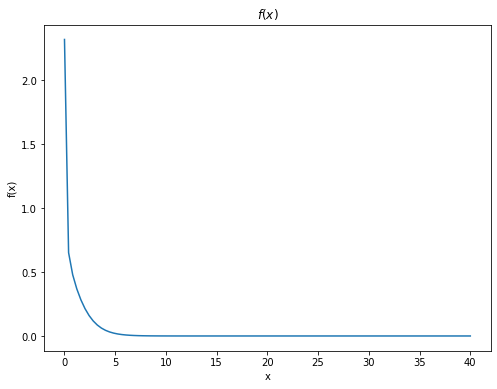

In [ ]:
# Se grafica desde un valor razonable cercano a 0, hasta 40
# Para ver que para valores razonables x la función es cercana a 0
# Por lo aporta poco a la integral desde un cierto x
X = np.linspace(0.01,40,num=100)
fig = plt.figure(figsize=(8,6))
plt.plot(X,f_1(X))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)$")
plt.show()

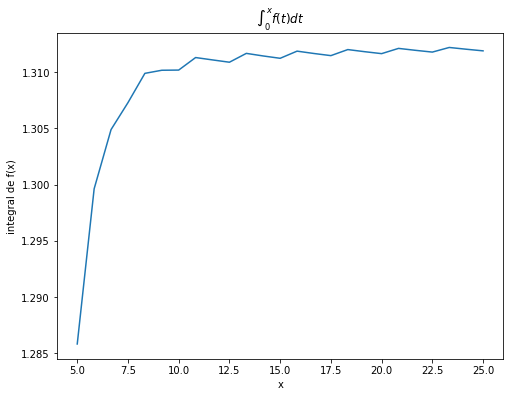

In [ ]:
# Se grafica el valor de la integral de función para distintos valores 
# de límites superiores

# Arreglo de valores de límites superiores
B = np.linspace(5,25,num=25)

# Arreglo para almacenar los valores de la integral
I = np.zeros(len(B))

# Valor razonable cercano a 0
delta = 0.001

# Paso de integración
h = 0.01

# Se calculan las integrales
for i in range(len(B)):
    I[i] = int_trap(delta,B[i],h,f_1)

# Gráfico    
fig = plt.figure(figsize=(8,6))
plt.plot(B,I)
plt.xlabel("x")
plt.ylabel("integral de f(x)")
plt.title("$\int_{0}^{x} f(t)dt$")
plt.show()

A continuación se muestra que la integral estabiliza su valor para cierto valor del límite superior $b$. Para ello nos fijaremos en el tercer décimal de la proporción entre términos sucesivos, ya que este decimal es el primero significativo.

In [ ]:
# Estudiamos las diferencias entre integraciones sucesivas
print("Límite superior  Valor integral  Proporción relativa con el anterior")
for i in range(1,len(I)):
    D = (abs(I[i]/I[i-1])-1)*10**3
    print("    "+str(round(B[i],2))+"              "+str(round(I[i],3))+"                "+str(round(D,6)))

Límite superior  Valor integral  Proporción relativa con el anterior
    5.83              1.3                10.731157
    6.67              1.305                4.051166
    7.5              1.307                1.83526
    8.33              1.31                1.991565
    9.17              1.31                0.210308
    10.0              1.31                0.012524
    10.83              1.311                0.849785
    11.67              1.311                -0.160445
    12.5              1.311                -0.156548
    13.33              1.312                0.599869
    14.17              1.311                -0.175578
    15.0              1.311                -0.157841
    15.83              1.312                0.485171
    16.67              1.312                -0.159494
    17.5              1.311                -0.144493
    18.33              1.312                0.410135
    19.17              1.312                -0.143544
    20.0              1.312           

Con esto último vemos que desde $b=20$ se puede ver una especie de estabilidad en el valor de la integral.

### Problema 1 parte b

Veremos que las diferencias entre integrales calculadas con los distintos $h$ dados son del orden de $10\%$.

In [ ]:
b = 20
H = [0.1,0.01,0.001]
print(" h         Integral              Error ")
for i in range(len(H)):
    if i==0:
        print(str(H[i])+"  "+str(int_trap(0.001,b,H[i],f_1))+"            -       ")
    else:
        er = int_trap(H[0],b,H[0],f_1)/int_trap(H[i],b,H[i],f_1)
        print(str(H[i])+"  "+str(int_trap(H[i],b,H[i],f_1))+"  "+str(1-er))

 h         Integral              Error 
0.1  1.4443436061540984            -       
0.01  1.2777111723196435  0.10541976654994645
0.001  1.305750988878546  0.12463006457522541


### Problema 1 parte c

La integral es:

\begin{equation*}
    \int_{0}^{\infty} \frac{x^{2/3}}{e^x-e^{-x}}dx
\end{equation*}

Aproximando por Taylor lineal el denominado:

\begin{equation*}
    e^x-e^{-x} = 2x + o(x^2)
\end{equation*}

Donde:

\begin{equation*}
    \lim_{x \rightarrow 0} \frac{x^{2/3}}{e^x-e^{-x}} = x^{-1/3}
\end{equation*}

Entonces haciendo un cambio de variable $y=x^{2/3}$, $dy = \frac{2}{3}x^{-1/3}dx$ con lo que $x = y^{3/2}$, $dx = \frac{3}{2}y^{1/2}dy$, $x \rightarrow 0 \Rightarrow y = 0$, $x \rightarrow \infty \Rightarrow y = \infty$. Luego, la integral queda:

\begin{equation*}
    \int_{0}^{\infty} \frac{3}{2} \frac{y^{3/2}}{(e^{\: y^{3/2}}-e^{\: -y^{3/2}})} dy
\end{equation*}

Donde:

\begin{equation*}
    \lim_{y \rightarrow 0} \frac{3}{2} \frac{y^{3/2}}{(e^{\: y^{3/2}}-e^{\: -y^{3/2}})} = \frac{3}{2} \lim_{y \rightarrow 0} \frac{\frac{3}{2} y^{1/2}}{(\frac{3}{2}y^{1/2}e^{\: y^{3/2}}+\frac{3}{2}y^{1/2}e^{\: -y^{3/2}})} = \frac{3}{2} \lim_{y \rightarrow 0} \frac{1}{(e^{\: y^{3/2}}+e^{\: -y^{3/2}})} = \frac{3}{2} \cdot \frac{1}{2} = \frac{3}{4}
\end{equation*}

Y:

\begin{equation*}
    \lim_{y \rightarrow \infty} \frac{y^{3/2}}{(e^{\: y^{3/2}}-e^{\: -y^{3/2}})} = 0
\end{equation*}

Además, el integrando no diverge para ningún valor del $(0,\infty)$, ya que la función es continua en cualquier $x \in (0,\infty)$ por álgebra y composición de funciones continuas en el intervalo.

*Nota: A efectos numéricos, esta función sigue estando indefinida en 0, por lo que seguiremos evaluando esta en un valor razonablemente cercano a 0.*

In [ ]:
# Función que simula lo resultante al hacer el cambio de variable
def f_2(y):
    a = 3*y**(3/2)
    b = 2*np.exp(y**(3/2))-2*np.exp(-y**(3/2))
    return a/b

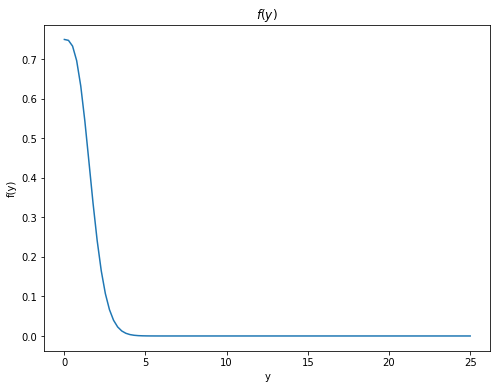

In [ ]:
# Gráfico de la función nueva
Y = np.linspace(0.01,25,num=100)
fig = plt.figure(figsize=(8,6))
plt.plot(Y,f_2(Y))
plt.xlabel("y")
plt.ylabel("f(y)")
plt.title("$f(y)$")
plt.show()

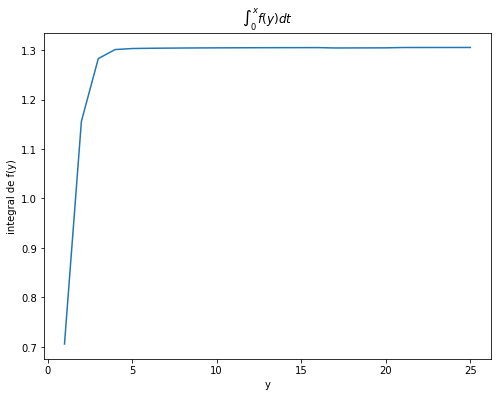

In [ ]:
# Se grafica el valor de la integral de función para distintos valores 
# de límites superiores

# Arreglo de valores de límites superiores
B = np.linspace(1,25,num=25)

# Arreglo para almacenar los valores de la integral
I = np.zeros(len(B))

# Paso de integración
h = 0.01

# Se calculan las integrales
for i in range(len(B)):
    I[i] = int_trap(h,B[i],h,f_2)

# Gráfico    
fig = plt.figure(figsize=(8,6))
plt.plot(B,I)
plt.xlabel("y")
plt.ylabel("integral de f(y)")
plt.title("$\int_{0}^{x} f(y)dt$")
plt.show()

In [ ]:
print("Límite superior  Integral     Error ")
for i in range(1,len(B)):
    print("    "+str(B[i])+"           "+str(round(I[i],4))+"      "+str(round(I[i]-I[i-1],4)))


Límite superior  Integral     Error 
    2.0           1.156      0.45
    3.0           1.2827      0.1268
    4.0           1.301      0.0182
    5.0           1.303      0.002
    6.0           1.3035      0.0005
    7.0           1.3038      0.0003
    8.0           1.304      0.0002
    9.0           1.3042      0.0002
    10.0           1.3044      0.0001
    11.0           1.3045      0.0001
    12.0           1.3046      0.0001
    13.0           1.3047      0.0001
    14.0           1.3047      0.0001
    15.0           1.3048      0.0001
    16.0           1.3049      0.0001
    17.0           1.3041      -0.0007
    18.0           1.3042      0.0001
    19.0           1.3043      0.0001
    20.0           1.3044      0.0001
    21.0           1.3051      0.0007
    22.0           1.3051      0.0
    23.0           1.3051      0.0
    24.0           1.3051      0.0
    25.0           1.3052      0.0


Vemos que desde un límite superior $b=4$, ya se alcanza un valor de la integral $I=1.3$ aproximadamente. Dado que desde $b=10$ se tiene una diferencia menor a $0.0001$, se tomará este valor de límite superior como uno razonable, pero depende de cuanta tolerancia se pida cual será el valor razonable para $b$.

Además, se comprueba que la diferencia entre lo calculado con $h=0.01$ y $h=0.001$ es de menos del $1\%$.

In [ ]:
# Verificamos que el error sea menor a 1 porciento o 0.01
print(int_trap(0.001,10,0.01,f_2)/int_trap(0.01,10,0.01,f_2)-1)

0.004264964081482692


### Problema 2 parte a)

Se replica el algoritmo visto en clases (videos), con algunos comentarios un poco más descriptivo. Al final se imprime el valor de $x$, que se ve es el mismo pedido a demostrar.

In [ ]:
# Matriz que representa el sistema
A = np.array([[1.,3.,2.,3.,2.,-2.],
             [1.,3.,5.,1.,0.,1.],
             [2.,2.,1.,3.,1.,3.],
             [3.,1.,3.,5.,2.,-1.],
             [2.,0.,1.,2.,1.,2.],
             [-2.,1.,3.,-1.,2.,5.]])

# Vector de lado derecho
b = np.array([26.,21.,38.,40.,26.,35.])

# Largo del problema, arista de la matriz
N = len(A[0])

# Matriz identidad
I = np.eye(N, dtype=float)

# Arreglos auxiliares para permutar filas de A e I, respectivamente
fa = np.empty(N,dtype=float)
fi = np.empty(N,dtype=float)

# Iteramos sobre las columnas
for i in range(N):

    # == Pivoteo ==

    # Postulamos como máximo al pivote actual
    pind = i
    # Iteramos sobre las filas inferiores a la actual
    for j in range(N-i):
        # Si encontramos una que sea mayor, la guardamos como la posición
        # de máximo pivote
        if A[j+i,i]>A[pind,i]:
            pind = j+i
    
    # Permutación de valores en b
    fb = b[pind]
    b[pind] = b[i]
    b[i] = fb
    
    # Entramos en las respectivas filas de A para permutar valores
    for k in range(N):
        # Permutación en A
        fa[k] = A[pind,k]
        A[pind,k] = A[i,k]
        A[i,k] = fa[k]

    # == Fin pivoteo ==

    # == Gauss-Jordan ==
    p1 = A[i,i]

    # Dividimos por el pivote actual
    b[i] = b[i]/p1
    A[i] = A[i]/p1

    # Ahora iteramos sobre las filas para multiplicar por los respectivos valores
    for j in range(N):
        # Ignoramos el pivote actual
        if j!=i:
            p2 = A[j,i]
            # Se hace la operación en b
            b[j] = b[j] - p2*b[i]
            # Se hace la operación sobre A 
            for k in range(N): 
                A[j,k] += - p2*A[i,k]
    # == Fin Gauss-Jordan ==
    # Fin iteración i

print("x = ")
print(b)

x = 
[-1.81843887e+01  4.38877761e+01  1.14748568e+02  4.20039044e+01
  2.05806845e+00 -8.41102426e-03]


### Problema 2 parte b)

Se hace en esencia lo mismo en a), pero ahora se hacen las permutaciones en la matriz identidad que guarda todas las operaciones hechas. Al final esta matriz se convertirá en la inversa de $A$, se imprime su valor al final para ver que era lo pedido. Además, en otra celda se comprueba que $A^{-1}\cdot b = x$.

In [ ]:
# Matriz que representa el sistema
A = np.array([[1.,3.,2.,3.,2.,-2.],
             [1.,3.,5.,1.,0.,1.],
             [2.,2.,1.,3.,1.,3.],
             [3.,1.,3.,5.,2.,-1.],
             [2.,0.,1.,2.,1.,2.],
             [-2.,1.,3.,-1.,2.,5.]])

# Vector de lado derecho
b = np.array([26.,21.,38.,40.,26.,35.])

# Largo del problema, arista de la matriz
N = len(A[0])

# Matriz identidad
I = np.eye(N, dtype=float)

# Arreglos auxiliares para permutar filas de A e I, respectivamente
fa = np.empty(N,dtype=float)
fi = np.empty(N,dtype=float)

# Iteramos sobre las columnas
for i in range(N):

    # == Pivoteo ==

    # Postulamos como máximo al pivote actual
    pind = i
    # Iteramos sobre las filas inferiores a la actual
    for j in range(N-i):
        # Si encontramos una que sea mayor, la guardamos como la posición
        # de máximo pivote
        if A[j+i,i]>A[pind,i]:
            pind = j+i
    
    # Permutación de valores en b
    fb = b[pind]
    b[pind] = b[i]
    b[i] = fb
    
    # Entramos en las respectivas filas de A e I para permutar valores
    for k in range(N):
        # Permutación en A
        fa[k] = A[pind,k]
        A[pind,k] = A[i,k]
        A[i,k] = fa[k]

        # Permutación en I
        fi[k] = I[pind,k]
        I[pind,k] = I[i,k]
        I[i,k] = fi[k]
    # == Fin pivoteo ==

    # == Gauss-Jordan ==
    p1 = A[i,i]

    # Dividimos por el pivote actual
    b[i] = b[i]/p1
    I[i] = I[i]/p1
    A[i] = A[i]/p1

    # Ahora iteramos sobre las filas para multiplicar por los respectivos valores
    for j in range(N):
        # Ignoramos el pivote actual
        if j!=i:
            p2 = A[j,i]
            # Se hace la operación en b
            b[j] = b[j] - p2*b[i]
            # Se hace la operación sobre A e I, respectivamente
            for k in range(N):
                I[j,k] += - p2*I[i,k] 
                A[j,k] += - p2*A[i,k]
    # == Fin Gauss-Jordan ==
    # Fin iteración i

# Se imprime el valor de A^-1
print("A^-1 =")
print(I)

A^-1 =
[[ 0.38095238  0.15873016 -0.41269841 -0.55555556  1.23809524 -0.23809524]
 [ 0.29365079  0.08068783  0.14021164 -0.32407407  0.07936508 -0.07936508]
 [-0.13492063  0.1521164  -0.14550265  0.17592593 -0.06349206  0.06349206]
 [-0.45238095 -0.1468254   0.53174603  0.63888889 -1.0952381   0.0952381 ]
 [ 0.54761905 -0.1468254  -0.46825397 -0.36111111  0.9047619   0.0952381 ]
 [-0.13492063 -0.01455026  0.18783069  0.00925926 -0.06349206  0.06349206]]


In [ ]:
# Se comprueba la igualdad pedida
print("A^-1*b = ")
print(np.dot(I,np.array([26.,21.,38.,40.,26.,35.])))
print("x = ")
print(b)

A^-1*b = 
[-0.80952381  0.98015873  1.76587302  5.77380952  5.77380952  4.26587302]
x = 
[-0.80952381  0.98015873  1.76587302  5.77380952  5.77380952  4.26587302]
